# Satellite Image Visualization for L2 products

## NOAA products

In [40]:
#==================== We set product parameters to download ====================
import os, re

# You can create a list of number strings by using: [f"{i:02}" for i in range(13)]
destination_path = '.\\GOESimages\\'
bucket = 'noaa-goes16'
satellite = bucket[re.search('noaa-',bucket).end():]
'''
ABI-L2-DSRF: Downward Shortwave Radiation (1 file per hour)
ABI-L2-ACMF: Clear Sky Mask (6 files per hour)
ABI-L2-TPWF: Total Precipitable Water (6 files per hour)
ABI-L2-RRQPEF: Rainfall rate (6 files per hour)
ABI-L2-LSTF: Land surface temperature (1 files per hour)
'''
product=['ABI-L2-DSRF','ABI-L2-ACMF','ABI-L2-TPWF','ABI-L2-RRQPEF','ABI-L2-LSTF'] # Product to select
channel=['C01','C02','C03'] # Number of band to select from 'C01' to 'C16'
# Select a product and channel to process
selected_product = product[1]
domain = selected_product[-1]
selected_channel = channel[0]
day, month, year = '05', '08', '2023' # Date in dd/mm/yyyy format
hour = '17' # UTC, should be a string number between '00' and '23'

#==================== Building the path to the folder for file storage ====================
FilePath = os.path.join(destination_path,satellite,year, month, day, selected_product,hour)
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP") :
    FilePath = os.path.join(FilePath,channel[0])
print("Processing files in path: {}".format(FilePath))

if os.path.exists(FilePath):
    files = os.listdir(FilePath)
    display(files)
else: print("Directory does not exist.")

Processing files in path: .\GOESimages\goes16\2023\08\05\ABI-L2-ACMF\17


['OR_ABI-L2-ACMF-M6_G16_s20232171700204_e20232171709512_c20232171710332.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171710202_e20232171719510_c20232171720341.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171720202_e20232171729510_c20232171730286.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171730202_e20232171739510_c20232171740299.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171740202_e20232171749510_c20232171750303.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171750202_e20232171759510_c20232171800305.nc']

In [2]:
# from goespy.Downloader import ABI_Downloader
# ABI = ABI_Downloader(destination_path,bucket,year,month,day,hour,selected_product,selected_channel)

In [41]:
import ipywidgets as widgets

files = os.listdir(FilePath)
files = [file for file in files if file.endswith('.nc')]
print("GOES images available:")
display(files)

# Create dropdown widget with index values of files list
file_selector = widgets.Dropdown(
    options=list(range(len(files))),
    value=0,
    description='Select file:',
)

# Define function to display selected file
def on_file_select(change):
    global selected_index
    selected_index = change['new']
    print(f'Selected file: {files[selected_index]}')

# Call function to display initial file
on_file_select({'new': file_selector.value})

# Link widget selection to function call
file_selector.observe(on_file_select, names='value')
display(file_selector)
FileName = files[selected_index]

GOES images available:


['OR_ABI-L2-ACMF-M6_G16_s20232171700204_e20232171709512_c20232171710332.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171710202_e20232171719510_c20232171720341.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171720202_e20232171729510_c20232171730286.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171730202_e20232171739510_c20232171740299.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171740202_e20232171749510_c20232171750303.nc',
 'OR_ABI-L2-ACMF-M6_G16_s20232171750202_e20232171759510_c20232171800305.nc']

Selected file: OR_ABI-L2-ACMF-M6_G16_s20232171700204_e20232171709512_c20232171710332.nc


Dropdown(description='Select file:', options=(0, 1, 2, 3, 4, 5), value=0)

In [42]:
from datetime import datetime
# Building image name format
start_date_str = FileName.split("_s")[1][:13]
start_date = datetime.strptime(start_date_str, "%Y%j%H%M%S").strftime('%Y-%m-%d %H:%M:%S')
img_year, img_month, img_day = start_date[:4], start_date[5:7], start_date[8:10]
img_hour, img_minute, img_seconds = start_date[11:13], start_date[14:16], start_date[17:20]
if ( selected_product[:-1] == "ABI-L1b-Rad") or (selected_product[:-1] == "ABI-L2-CMIP"):
    ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ selected_channel +'_'+ img_hour +'_'+ img_minute + '.png'
else: ImageName = satellite +'_'+ img_year +'_'+ img_month +'_'+ img_day +'_'+ selected_product.split('-')[-1] +'_'+ img_hour +'_'+ img_minute + '.png'
FullImagePath = os.path.join(FilePath, ImageName)

In [43]:
#==================== Read the dataset and its metadata ====================
import xarray as xr

FullFilePath = os.path.join(FilePath,FileName)
data = xr.open_dataset(FullFilePath, engine='netcdf4')
if ('lon' in data.coords) and ('lat' in data.coords): coords = "lonlat"
elif ('x' in data.coords) and ('y' in data.coords): coords = "xy"
data

<xarray.Dataset>
Dimensions:                                                     (y: 5424,
                                                                 x: 5424,
                                                                 number_of_time_bounds: 2,
                                                                 number_of_image_bounds: 2,
                                                                 RTM_BT_comparison_bands: 2,
                                                                 number_of_focal_planes_used: 2,
                                                                 number_of_LZA_bounds: 2,
                                                                 number_of_SZA_bounds: 2)
Coordinates:
  * y                                                           (y) float64 0...
  * x                                                           (x) float64 -...
    t                                                           datetime64[ns] ...
    y_image                                                     float32 ...
    x_image                                                     float32 ...
    retrieval_local_zenith_angle                                float32 ...
    quantitative_local_zenith_angle                             float32 ...
    retrieval_solar_zenith_angle                                float32 ...
    RTM_BT_comparison_wavelengths                               (RTM_BT_comparison_bands) float32 ...
    RTM_BT_comparison_band_ids                                  (RTM_BT_comparison_bands) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                RTM_BT_comparison_bands,
                                number_of_focal_planes_used,
                                number_of_LZA_bounds, number_of_SZA_bounds
Data variables: (12/41)
    BCM                                                         (y, x) float32 ...
    ACM                                                         (y, x) float32 ...
    Cloud_Probabilities                                         (y, x) float32 ...
    DQF                                                         (y, x) float32 ...
    time_bounds                                                 (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                      int32 ...
    ...                                                          ...
    quantitative_local_zenith_angle_bounds                      (number_of_LZA_bounds) float32 ...
    twilight_solar_zenith_angle                                 float32 ...
    retrieval_solar_zenith_angle_bounds                         (number_of_SZA_bounds) float32 ...
    twilight_solar_zenith_angle_bounds                          (number_of_SZA_bounds) float32 ...
    percent_uncorrectable_GRB_errors                            float32 ...
    percent_uncorrectable_L0_errors                             float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2023-08-05T17:10:33.2Z
    time_coverage_start:       2023-08-05T17:00:20.4Z
    time_coverage_end:         2023-08-05T17:09:51.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        b5780c0d-78db-4dac-91d5-e3880c34b929

In [6]:
#==================== Setting up time reference variables ====================
from datetime import datetime, timedelta
import pytz, time
utc = pytz.timezone('UTC') # UTC timezone
utcm5 = pytz.timezone('America/Lima') # UTC-5 timezone

#==================== Getting information from GOES image dataset ====================
import numpy as np
varname = list(data.data_vars.keys())[0]
ImgTime = data.t.values
ImgTime = utc.localize(datetime.utcfromtimestamp(ImgTime.tolist()//10**9))
minute = str(ImgTime.minute).zfill(2)
str_ImgTime = ImgTime.strftime('%Y-%m-%d %H:%M %Z')

spatial_res = data.attrs["spatial_resolution"].split()[0]
spatial_res = float(re.findall('\d+',spatial_res)[0])

LonCenter = data.geospatial_lat_lon_extent.geospatial_lon_center
LatCenter = data.geospatial_lat_lon_extent.geospatial_lat_center
LonLimits = np.array([data.geospatial_lat_lon_extent.geospatial_westbound_longitude, data.geospatial_lat_lon_extent.geospatial_eastbound_longitude])
LatLimits = np.array([data.geospatial_lat_lon_extent.geospatial_southbound_latitude, data.geospatial_lat_lon_extent.geospatial_northbound_latitude])
imgExtention = [LonLimits[0], LonLimits[1], LatLimits[0], LatLimits[1]]
PeruLimits_deg = [-85, -67.5, -20.5, 1.0] # Define the coordinates of the bounding box around Peru

print("Variable name: {}\n"
      "Longitude Limits: {} \n"
      "Latitude Limits: {}\n"
      "(LonCenter,LatCenter): {}".format(varname,LonLimits,LatLimits,(LonCenter,LatCenter)))

#==================== Creating georeferenced variables ====================
import geopandas as gpd
from shapely.geometry import Polygon
import cartopy.feature as cfeature
# Add coastlines feature
coastlines_feature = cfeature.NaturalEarthFeature(
    category='physical',
    name='coastline',
    scale='50m',
    edgecolor='black',
    facecolor='none')
# Add country boundaries feature
countries_feature = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none')

# Create the polygon representing the bounding box
peru_bbox = Polygon([(PeruLimits_deg[0], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[2]), (PeruLimits_deg[1], PeruLimits_deg[3]), (PeruLimits_deg[0], PeruLimits_deg[3])])
# gdf_countries = gpd.read_file("./Boundaries/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
gdf_maritime = gpd.read_file("./Boundaries/World_EEZ_v11_20191118/eez_v11.shp",mask=peru_bbox)
gdf_states = gpd.read_file("./Boundaries/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp",mask=peru_bbox)

# Filter the GeoDataFrame to keep only rows where adm1_code matches "PER"
gdf_peru_land = gdf_states[gdf_states["adm1_code"].str[:3] == "PER"]
gdf_peru_sea = gdf_maritime[gdf_maritime["TERRITORY1"] == "Peru"].iloc[[1]]
# gdf_maritime = gdf_maritime[gdf_maritime["TERRITORY1"] != "Peru"]

#==================== Defining projections ====================
import cartopy.crs as ccrs
map_proj_ortho = ccrs.Orthographic(central_longitude=LonCenter, central_latitude=LatCenter), "Orthographic"
map_proj_pc = ccrs.PlateCarree(), "PlateCarree projection"
if (coords == "lonlat"):
    gproj = data['goes_lat_lon_projection']
    map_proj_geos = ccrs.Geostationary(
                  central_longitude=LonCenter,
                  satellite_height=data.nominal_satellite_height.values*1000,
                  sweep_axis='x',
                  globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                              semimajor_axis=gproj.semi_major_axis, 
                              semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_pc
    map_proj_dst = map_proj_geos
elif (coords == "xy"):
    gproj = data['goes_imager_projection']
    map_proj_geos = ccrs.Geostationary(
                    central_longitude=LonCenter,
                    satellite_height=data.nominal_satellite_height.values*1000,
                    sweep_axis=gproj.sweep_angle_axis,
                    globe=ccrs.Globe(ellipse='sphere', # 'sphere', 'WGS84'
                                    semimajor_axis=gproj.semi_major_axis, 
                                    semiminor_axis=gproj.semi_minor_axis)), "Geostationary projection"
    map_proj_src = map_proj_geos
    map_proj_dst = map_proj_pc

Variable name: LST
Longitude Limits: [-156.2995    6.2995] 
Latitude Limits: [-81.3282  81.3282]
(LonCenter,LatCenter): (-75.0, 0.0)


### Transforming array projections with plots

In [7]:
from myfunctions.GOESfunctions import *
colormaps = definingColormaps()
product_cmap = colormaps[selected_product]

{'ABI-L2-DSRF': 'turbo',
 'ABI-L2-ACMF': 'rainbow',
 'ABI-L2-TPWF': 'terrain',
 'ABI-L2-LSTF': 'jet',
 'ABI-L2-RRQPEF': <matplotlib.colors.ListedColormap at 0x189325c1590>}

In [8]:
import importlib, sys
importlib.reload(sys.modules['myfunctions.GOESfunctions'])
from myfunctions.GOESfunctions import *

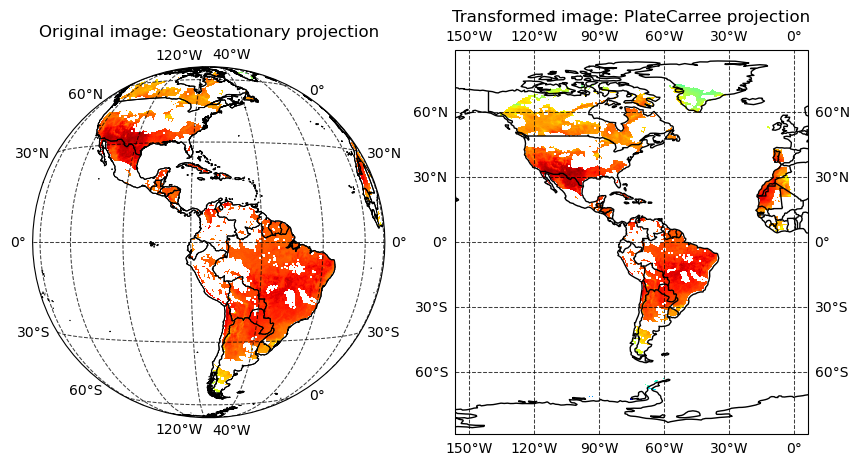

In [9]:
transformed_data, extent_deg = plotBothProjections(data,globals())

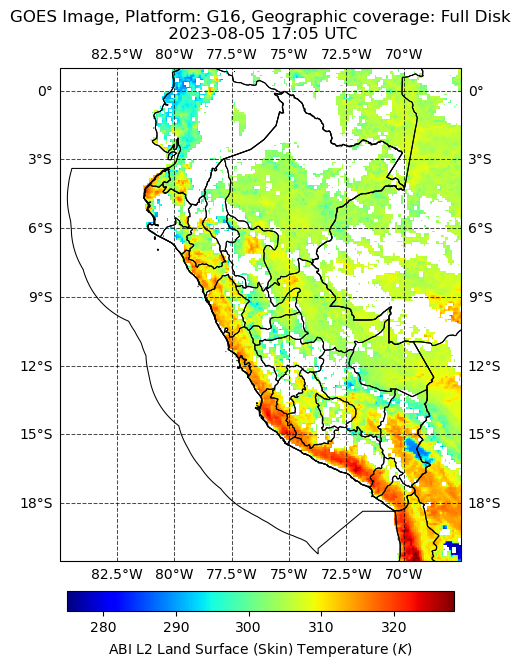

Image 'goes16_2023_08_05_LSTF_17_05.png' saved in '.\GOESimages\goes16\2023\08\05\ABI-L2-LSTF\17'


In [10]:
plotSatImg(data,globals())

### Transforming array projections with functions

In [ ]:
department_names = sorted(gdf_peru_land['name'].tolist())
department_names

['Amazonas',
 'Apurímac',
 'Arequipa',
 'Ayacucho',
 'Cajamarca',
 'Callao',
 'Cusco',
 'Huancavelica',
 'Huánuco',
 'Ica',
 'Junín',
 'La Libertad',
 'Lambayeque',
 'Lima',
 'Lima Province',
 'Loreto',
 'Madre de Dios',
 'Moquegua',
 'Pasco',
 'Piura',
 'Puno',
 'San Martín',
 'Tacna',
 'Tumbes',
 'Ucayali',
 'Áncash']

In [ ]:
from cartopy.img_transform import warp_array
olddata= np.flip(data[varname].values,0)
data_shape = (olddata.shape[0],olddata.shape[1])
# data_shape = (400, 200)
newdata, new_extent = warp_array(olddata, map_proj_dst[0], map_proj_src[0], target_res = data_shape, target_extent=PeruLimits_deg)
lon1D = np.linspace(new_extent[0], new_extent[1], data_shape[0])
lat1D = np.linspace(new_extent[2], new_extent[3], data_shape[1])
lon2D, lat2D = np.meshgrid(lon1D, lat1D)
plt.pcolormesh(lon2D, lat2D, newdata.data)

from shapely.geometry import Point
# Create an array of Point objects using the meshgrid coordinates
points = [Point(lon, lat) for lon, lat in zip(lon2D.ravel(), lat2D.ravel())]
# Create a boolean mask indicating which points are inside the polygon
polygon = gdf_peru_land[gdf_peru_land['name'] == "Loreto"]['geometry']
points_inside_polygon_mask = np.array([polygon.contains(point) for point in points])
# Reshape the mask to match the shape of the data array
points_inside_polygon_mask = points_inside_polygon_mask.reshape(lon2D.shape)
import numpy.ma as ma
data_masked = ma.array(newdata, mask=~points_inside_polygon_mask)
# Get the indices of the unmasked (relevant) region inside the polygon
min_lon_index = np.where(points_inside_polygon_mask.any(axis=0))[0].min()
max_lon_index = np.where(points_inside_polygon_mask.any(axis=0))[0].max()
min_lat_index = np.where(points_inside_polygon_mask.any(axis=1))[0].min()
max_lat_index = np.where(points_inside_polygon_mask.any(axis=1))[0].max()

# Extract the relevant portion of the array
reduced_array = data_masked[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]
lon2D_reduced = lon2D[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]
lat2D_reduced = lat2D[min_lat_index:max_lat_index + 1, min_lon_index:max_lon_index + 1]

plt.pcolormesh(lon2D_reduced,lat2D_reduced,reduced_array)

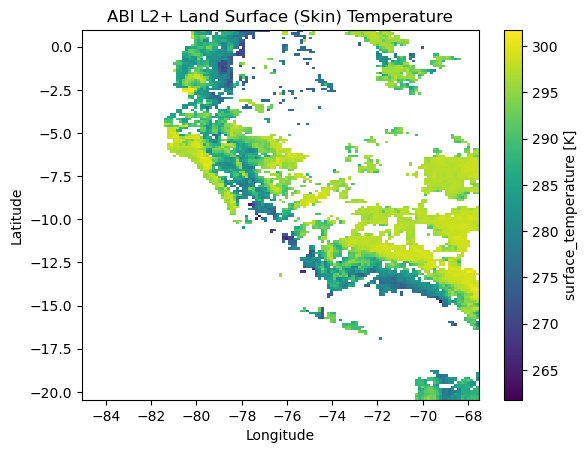

In [15]:
import matplotlib.pyplot as plt

ProductArray = data.values
Lon, Lat = data.x, data.y
fig, ax = plt.subplots()
im = ax.pcolormesh(Lon,Lat,ProductArray)
plt.colorbar(im, label = data.attrs['standard_name']+' ['+data.attrs['units']+']')
ax.set(title = data.attrs['long_name'],
       xlabel = "Longitude",
       ylabel = "Latitude")
plt.show()
# data.rio.to_raster('example.tif')

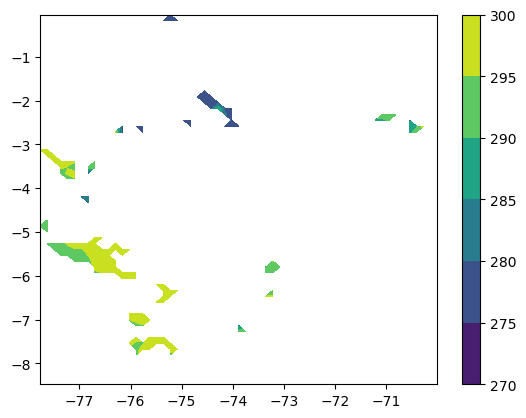

In [38]:
im2 = plt.contourf(lon,lat,data_clip.values,5)
plt.colorbar()